## Capstone 1: Instacart

In [1]:
#Run docker container
sudo docker run -d --name sparkbook -p 8881:8888 -v "$PWD":/home/jovyan/work jupyter/pyspark-notebook start.sh jupyter lab --LabApp.token=''

#Exec docker container
docker exec -it sparkbook

#Run Spark
#go on browser
localhost:8881

SyntaxError: invalid syntax (<ipython-input-1-e643fb580568>, line 2)

In [2]:
#Run1
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
#Run2
import pyspark as ps

spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('Instacart')
         .getOrCreate()
        )

sc = spark.sparkContext

In [4]:
sc

<SparkContext master=local[4] appName=Instacart>

In [5]:
#Run3
# insta_folder = '/Users/winrichsy/Desktop/Galvanize/capstone1_instacart/instacart_2017/'
insta_folder = 'instacart_2017/'


aisles_df = spark.read.csv(insta_folder+'aisles.csv',
                           header = True,
                           sep = ",",
                           inferSchema = True)

departments_df = spark.read.csv(insta_folder+'departments.csv',
                            header = True,
                            sep = ",",
                            inferSchema = True)

order_products_prior_df = spark.read.csv(insta_folder+'order_products__prior.csv',
                                     header = True,
                                     sep = ",",
                                     inferSchema = True)

order_products_train_df = spark.read.csv(insta_folder+'order_products__train.csv',
                                     header = True,
                                     sep = ",",
                                     inferSchema = True)

orders_df = spark.read.csv(insta_folder+'orders.csv',
                       header = True,
                       sep = ",",
                       inferSchema = True)

products_df = spark.read.csv(insta_folder+'products.csv',
                         header = True,
                         sep = ",",
                         inferSchema = True)

# ###
# aisles = pd.read_csv(insta_folder+'aisles.csv')
# departments = pd.read_csv(insta_folder+'departments.csv')
# order_products_prior = pd.read_csv(insta_folder+'order_products__prior.csv')
# order_products_train = pd.read_csv(insta_folder+'order_products__train.csv')
# orders = pd.read_csv(insta_folder+'orders.csv')
# products = pd.read_csv(insta_folder+'products.csv')

In [6]:
#Run4
aisles_df.createOrReplaceTempView('aisles')
departments_df.createOrReplaceTempView('departments')
order_products_prior_df.createOrReplaceTempView('orders_prior')
orders_df.createOrReplaceTempView('orders')
products_df.createOrReplaceTempView('products')

In [7]:
print('aisles_df rows: ', aisles_df.count())
aisles_df.printSchema()

print('departments_df rows: ', departments_df.count())
departments_df.printSchema()

print('order_products_prior_df rows: ', order_products_prior_df.count())
order_products_prior_df.printSchema()

print('order_products_train_df rows: ', order_products_train_df.count())
order_products_train_df.printSchema()

print('orders_df rows: ', orders_df.count())
orders_df.printSchema()

print('products: ', products_df.count())
products_df.printSchema()

aisles_df rows:  134
root
 |-- aisle_id: integer (nullable = true)
 |-- aisle: string (nullable = true)

departments_df rows:  21
root
 |-- department_id: integer (nullable = true)
 |-- department: string (nullable = true)

order_products_prior_df rows:  32434489
root
 |-- order_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)

order_products_train_df rows:  1384617
root
 |-- order_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)

orders_df rows:  3421083
root
 |-- order_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- eval_set: string (nullable = true)
 |-- order_number: integer (nullable = true)
 |-- order_dow: integer (nullable = true)
 |-- order_hour_of_day: integer (nullable = true)
 |-- days_since_prior_order: double (nullable

In [8]:
aisles_df.show(10)

+--------+--------------------+
|aisle_id|               aisle|
+--------+--------------------+
|       1|prepared soups sa...|
|       2|   specialty cheeses|
|       3| energy granola bars|
|       4|       instant foods|
|       5|marinades meat pr...|
|       6|               other|
|       7|       packaged meat|
|       8|     bakery desserts|
|       9|         pasta sauce|
|      10|    kitchen supplies|
+--------+--------------------+
only showing top 10 rows



In [9]:
departments_df.show(10)

+-------------+---------------+
|department_id|     department|
+-------------+---------------+
|            1|         frozen|
|            2|          other|
|            3|         bakery|
|            4|        produce|
|            5|        alcohol|
|            6|  international|
|            7|      beverages|
|            8|           pets|
|            9|dry goods pasta|
|           10|           bulk|
+-------------+---------------+
only showing top 10 rows



In [10]:
order_products_prior_df.show(25)

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       2|     33120|                1|        1|
|       2|     28985|                2|        1|
|       2|      9327|                3|        0|
|       2|     45918|                4|        1|
|       2|     30035|                5|        0|
|       2|     17794|                6|        1|
|       2|     40141|                7|        1|
|       2|      1819|                8|        1|
|       2|     43668|                9|        0|
|       3|     33754|                1|        1|
|       3|     24838|                2|        1|
|       3|     17704|                3|        1|
|       3|     21903|                4|        1|
|       3|     17668|                5|        1|
|       3|     46667|                6|        1|
|       3|     17461|                7|        1|
|       3|     32665|                8|        1|


In [11]:
orders_df.show(20)

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior|           3|        3|               12|                  21.0|
| 2254736|      1|   prior|           4|        4|                7|                  29.0|
|  431534|      1|   prior|           5|        4|               15|                  28.0|
| 3367565|      1|   prior|           6|        2|                7|                  19.0|
|  550135|      1|   prior|           7|        1|                9|                  20.0|
| 3108588|      1|   prior|           8|        1|               14|            

In [12]:
products_df.show(20)

+----------+--------------------+--------+-------------+
|product_id|        product_name|aisle_id|department_id|
+----------+--------------------+--------+-------------+
|         1|Chocolate Sandwic...|      61|           19|
|         2|    All-Seasons Salt|     104|           13|
|         3|Robust Golden Uns...|      94|            7|
|         4|Smart Ones Classi...|      38|            1|
|         5|Green Chile Anyti...|       5|           13|
|         6|        Dry Nose Oil|      11|           11|
|         7|Pure Coconut Wate...|      98|            7|
|         8|Cut Russet Potato...|     116|            1|
|         9|Light Strawberry ...|     120|           16|
|        10|Sparkling Orange ...|     115|            7|
|        11|   Peach Mango Juice|      31|            7|
|        12|Chocolate Fudge L...|     119|            1|
|        13|   Saline Nasal Mist|      11|           11|
|        14|Fresh Scent Dishw...|      74|           17|
|        15|Overnight Diapers..

In [195]:
#Run5
#Creates a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
#         width = rect.get_width()
#         print('width: ', width)
#         print('height: ', rect.get_height())
#         print('get_x: ', rect.get_x())
#         print('get_y: ', rect.get_y())
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    weight = 'bold',
                    textcoords="offset points",
                    ha='center', va='bottom',
                    size=15)

In [196]:
#Run6
#Creates a text label above each bar in *rects*, displaying its height.
def autolabel_h(rects):
    for rect in rects:
        width = rect.get_width()
#         print('width: ', width)
#         print('height: ', rect.get_height())
#         print('get_x: ', rect.get_x())
#         print('get_y: ', rect.get_y())
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3,-6),  # 3 points vertical offset
#                     weight = 'bold',
                    textcoords="offset points",
                    size=15)

In [215]:
# #Run7 #FIX HELPPER FUNCTION LATER
# #Print functions for bar graphs specifically
# def print_bar(df, x, y, title, x_label, y_label, vert=True, color_choice='blue', width=0.65, fig_size=(23,7)):
#     fig, ax = plt.subplots(figsize=fig_size)
    
#     if vert:
#         bars_for_annotation = ax.bar(df[x], df[y], color=color_choice, align='center', width=width)
#         plt.xticks(size = 13, rotation=90)
#         plt.yticks(size = 15)
#         plt.xlabel(x_label, size=20, color=color_choice)
#         plt.ylabel(y_label, size=20, color=color_choice)
#         plt.title(title, fontsize=30, color=color_choice)
#         autolabel(bars_for_annotation)
    
#     else:
#         bars_for_annotation = ax.barh(df[x], df[y], color=color_choice, align='center')
#         plt.xticks(size = 13, rotation=0)
#         plt.yticks(size = 15)
#         plt.xlabel(x_label, size=20, color=color_choice)
#         plt.ylabel(y_label, size=20, color=color_choice)
#         plt.title(title, fontsize=30, color=color_choice)
#         autolabel_h(bars_for_annotation)

#     plt.show()

### 1. The 12 Most Ordered Products of 2017

In [183]:
#1. Querying top 20 most ordered items
query = '''SELECT products.product_name, COUNT(orders_prior.product_id) as orders
            FROM orders_prior
            LEFT JOIN products
            ON products.product_id = orders_prior.product_id
            GROUP BY products.product_name
            ORDER BY orders DESC
            LIMIT 12'''

product_orders_count = spark.sql(query)

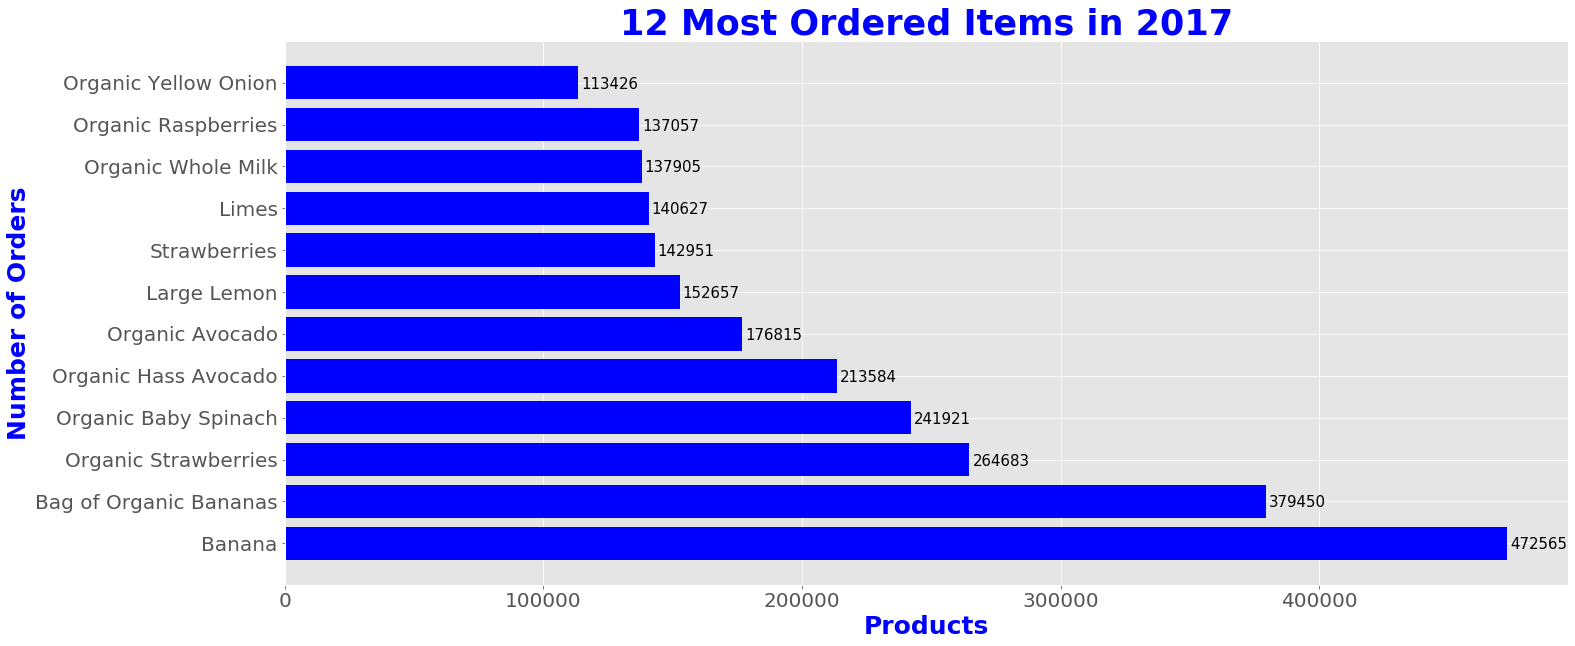

In [275]:
#1.1 Convert Spark df to pandas df and Print Bar Graph
#TODO: done
product_orders_count_df = product_orders_count.toPandas()
fig, ax = plt.subplots(figsize=(23,10))
most_popular = ax.barh(product_orders_count_df['product_name'], product_orders_count_df['orders'], color = 'blue', align='center')
plt.xticks(size = 20, rotation=0)
plt.yticks(size = 20)
plt.xlabel('Products', size=25, color='blue', weight='bold')
plt.ylabel('Number of Orders', size=25, color='blue', weight='bold')
plt.title('12 Most Ordered Items in 2017', fontsize=35, color='blue', weight='bold')

autolabel_h(most_popular)

plt.show()

### 2. Most Popular Item per Department

In [255]:
#2. Querying top item ordered from each department
query = ''' SELECT *
            FROM (
                SELECT *, 
                dense_rank() OVER (PARTITION BY department ORDER BY orders DESC) as product_rank
                FROM (
                    SELECT products.product_name, departments.department, COUNT(orders_prior.product_id) as orders
                    FROM orders_prior
                    LEFT JOIN products
                    ON products.product_id = orders_prior.product_id
                    LEFT JOIN departments
                    ON products.department_id = departments.department_id
                    GROUP BY products.product_name, departments.department
                    ) tmp
                ORDER BY orders DESC)
            WHERE product_rank = 1
        '''

most_prod_dept = spark.sql(query)
most_prod_dept = most_prod_dept.drop('product_rank')
# most_prod_dept.show()
#sql with?

In [276]:
#2.1 Convert to Pandas DF and change missing name in column
most_prod_dept_df = most_prod_dept.toPandas()
most_prod_dept_df.at[21,'department'] = 'etc'

#Add a new column with the names combined
most_prod_dept_df['product_and_dept'] = pd.Series(most_prod_dept_df['product_name']+' ['+most_prod_dept_df['department']+']')

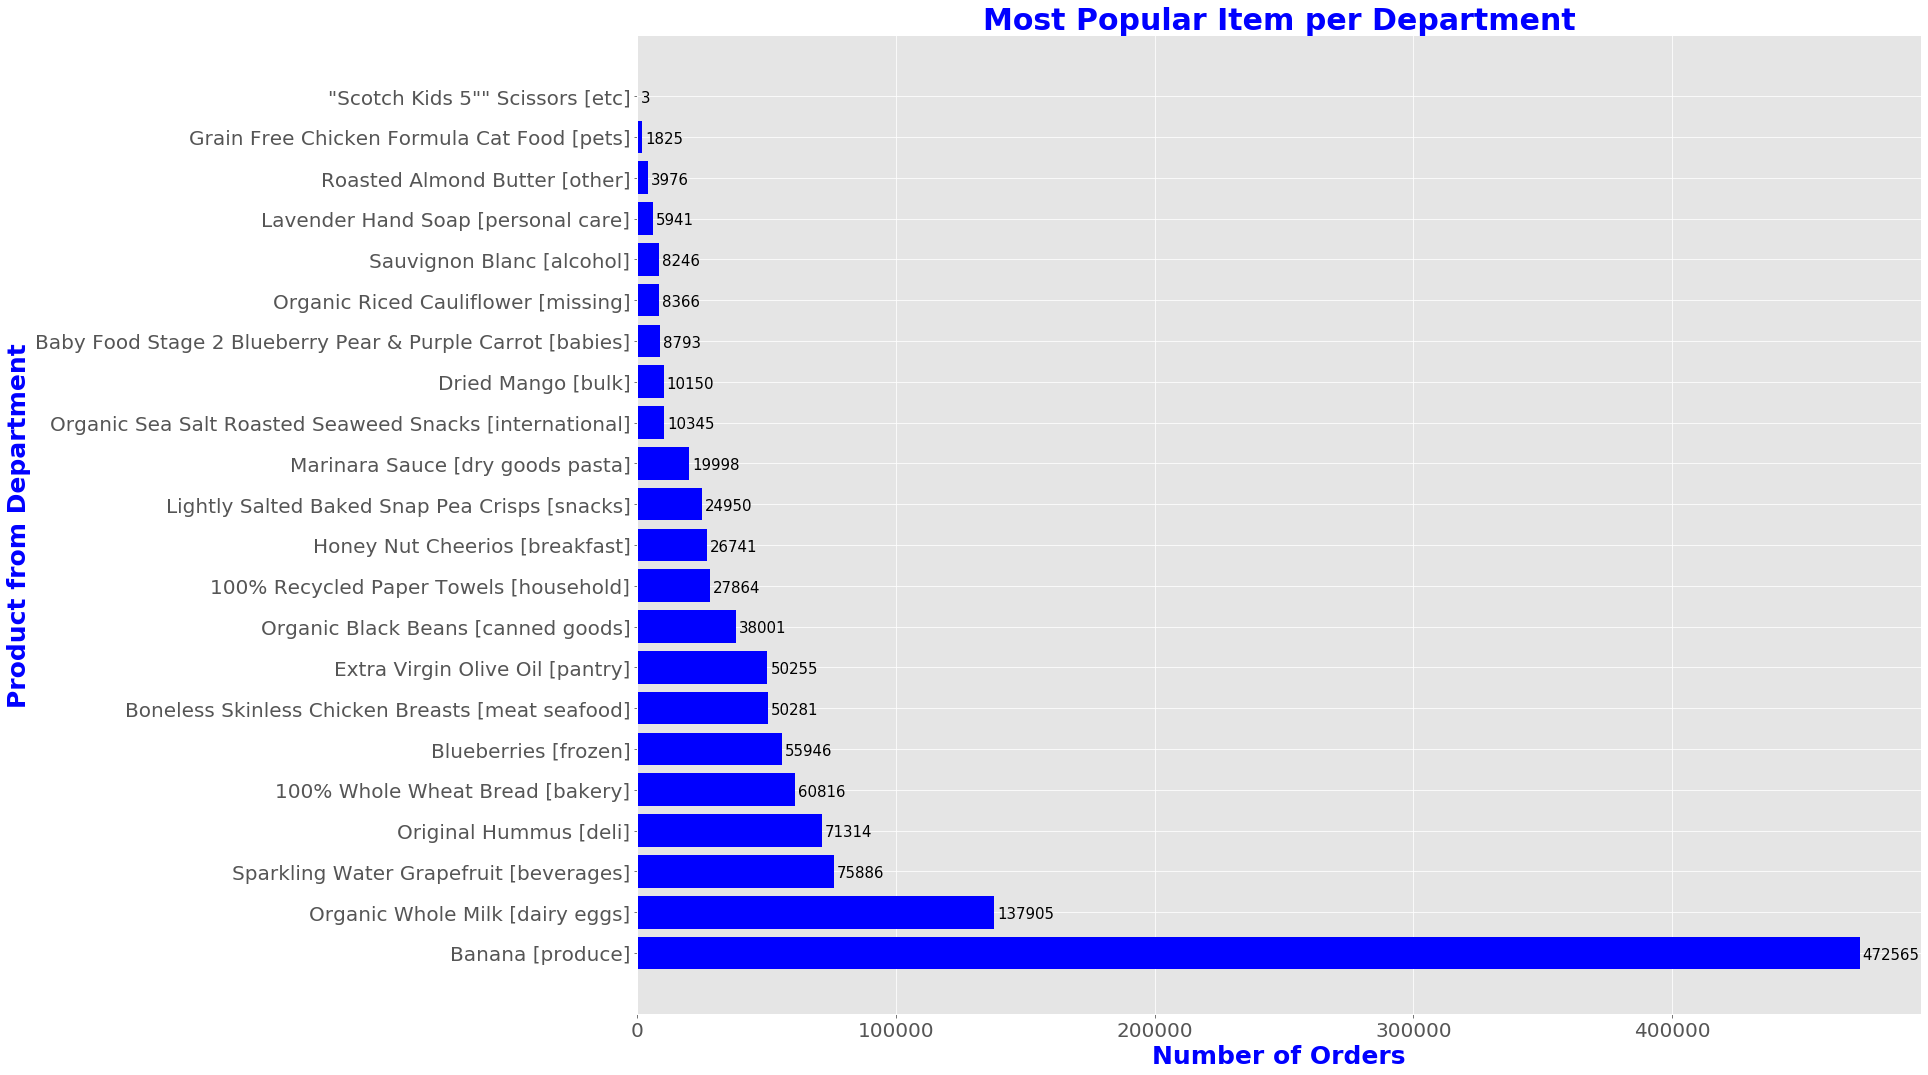

In [273]:
#2.2: Printing out the bargraph
#TODO: done
fig, ax = plt.subplots(figsize=(23,18))
popular_items = ax.barh(most_prod_dept_df['product_and_dept'], most_prod_dept_df['orders'], color = 'blue', align='center')
plt.xticks(size = 20, rotation=0)
plt.yticks(size = 20)
plt.xlabel('Number of Orders', size=25, color='blue', weight='bold')
plt.ylabel('Product from Department', size=25, color='blue', weight='bold')
plt.title('Most Popular Item per Department', fontsize=30, color='blue', weight='bold')

autolabel_h(popular_items)

plt.show()

In [265]:
most_prod_dept_df.loc[most_prod_dept_df['department'] == 'etc']

,product_name,department,orders,product_and_dept
21,"""Scotch Kids 5"""" Scissors",etc,3,"""Scotch Kids 5"""" Scissors [etc]"


### 3. The 12 Most Popular Organic Products

In [189]:
#3. Querying to get just organic items, then get the top 20
query = '''SELECT products.product_name, COUNT(orders_prior.product_id) as orders
            FROM products
            LEFT JOIN orders_prior
            ON products.product_id = orders_prior.product_id
            WHERE product_name LIKE "%Organic%"
            GROUP BY products.product_name
            ORDER BY orders DESC
            LIMIT 12
            '''

most_organics = spark.sql(query)

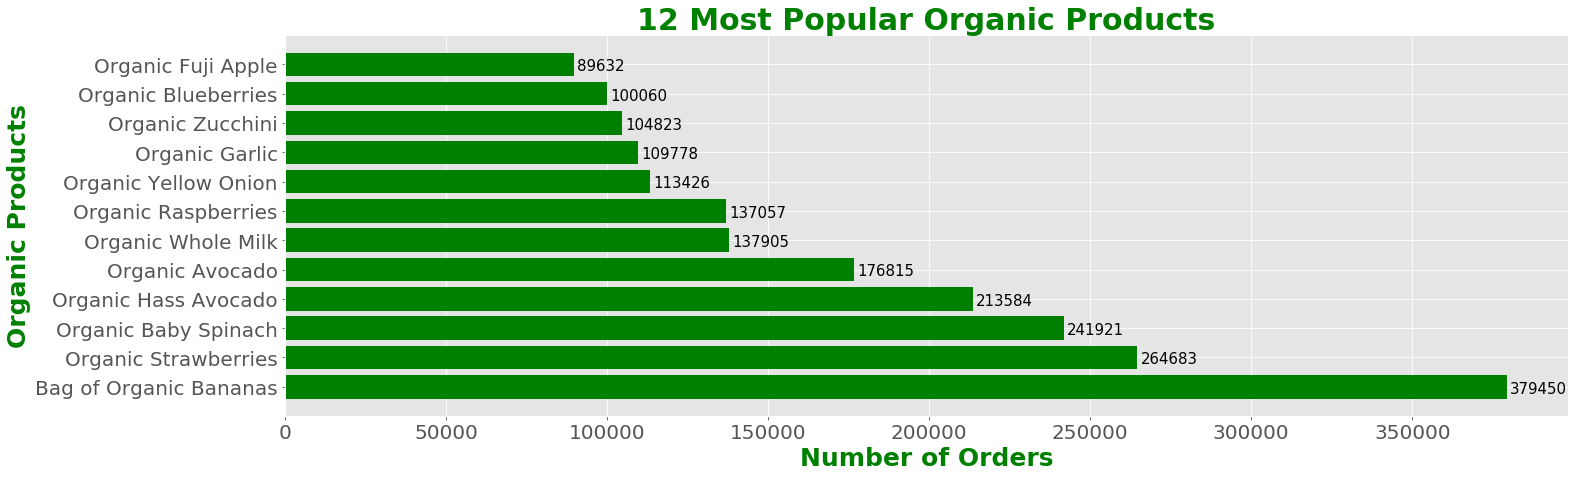

In [274]:
#3.1 Print Out Bar Graph
#TODO: done
most_organics_df = most_organics.toPandas()

fig, ax = plt.subplots(figsize=(23,7))
popular_organic_items = ax.barh(most_organics_df['product_name'], most_organics_df['orders'], color = 'green', align='center')
plt.xticks(size = 20, rotation=0)
plt.yticks(size = 20)
plt.xlabel('Number of Orders', size=25, color='green', weight='bold')
plt.ylabel('Organic Products', size=25, color='green', weight='bold')
plt.title('12 Most Popular Organic Products', fontsize=30, color='green', weight='bold')

autolabel_h(popular_organic_items)

plt.show()

### 4. The 12 Most Popular Non Organic Products

In [191]:
#4. Querying to get NON-organic items, then get the top 12
query = '''SELECT products.product_name, COUNT(orders_prior.product_id) as orders
            FROM products
            LEFT JOIN orders_prior
            ON products.product_id = orders_prior.product_id
            WHERE product_name NOT LIKE "%Organic%"
            GROUP BY products.product_name
            ORDER BY orders DESC
            LIMIT 12
            '''

most_non_organics = spark.sql(query)

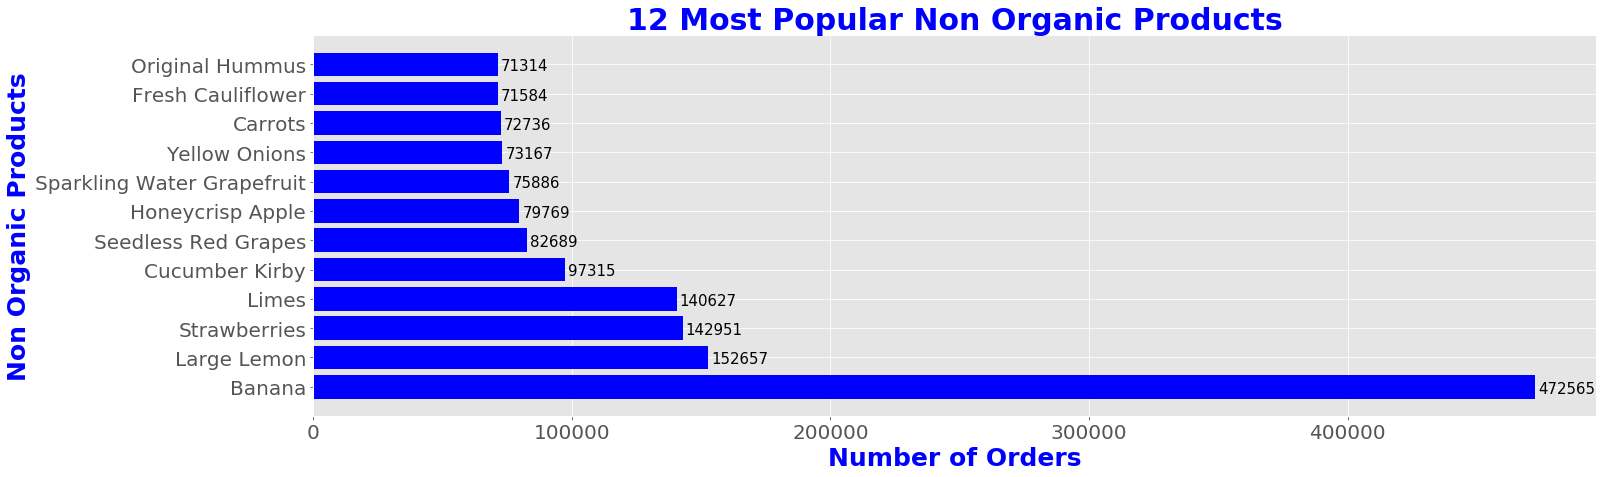

In [368]:
#4.1 Print Out Bar Graph
#TODO: done
most_non_organics_df = most_non_organics.toPandas()

fig, ax = plt.subplots(figsize=(23,7))
popular_non_organic_items = ax.barh(most_non_organics_df['product_name'], most_non_organics_df['orders'], color = 'blue', align='center')
plt.xticks(size = 20, rotation=0)
plt.yticks(size = 20)
plt.xlabel('Number of Orders', size=25, color='blue', weight='bold')
plt.ylabel('Non Organic Products', size=25, color='blue', weight='bold')
plt.title('12 Most Popular Non Organic Products', fontsize=30, color='blue', weight='bold')

autolabel_h(popular_non_organic_items)

plt.show()

### 5. How many products are Organic vs Non Organic

In [219]:
# 5. Querying to get NON-organic items, count how many were NEVER ORDERED. (only problem is we don't have data on when these items were added. could be soon or later)
query = '''SELECT products.product_name, COUNT(orders_prior.product_id) as orders
            FROM products
            LEFT JOIN orders_prior
            ON products.product_id = orders_prior.product_id
            WHERE product_name NOT LIKE "%Organic%"
            GROUP BY products.product_name
            '''
#NOTE: remove 

non_organics = spark.sql(query)

In [279]:
#5.1 Querying to get ORGANIC items, count how many were NEVER ORDERED.
query = '''SELECT products.product_name, COUNT(orders_prior.product_id) as orders
            FROM products
            LEFT JOIN orders_prior
            ON products.product_id = orders_prior.product_id
            WHERE product_name LIKE "%Organic%"
            GROUP BY products.product_name
            '''

organics = spark.sql(query)

In [ ]:
#5.2 Convert to Pandas df
non_organics_df = non_organics.toPandas()
organics_df = organics.toPandas()

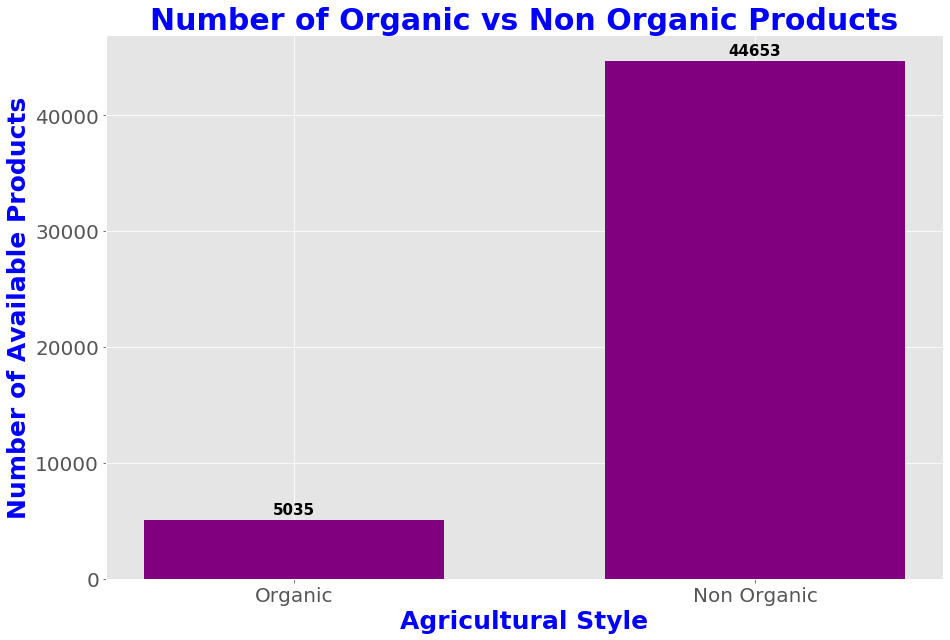

Percentage of Organic Products available:  10.133231363709548%
Percentage of NON Organic Products available:  89.86676863629044%


In [290]:
#5.3 Plot the difference between organic and non-organic items ordered
#TODO: done
organics_to_non_organics = {}
organics_to_non_organics['Organic'] = len(organics_df)
organics_to_non_organics['Non Organic'] = len(non_organics_df)

list_keys = [k for k in organics_to_non_organics]
list_values = [v for v in organics_to_non_organics.values()]

fig, ax = plt.subplots(figsize=(15,10))
items = ax.bar(list_keys, list_values, color = 'purple', align='center', width = 0.65)
plt.xticks(size = 20, rotation=0)
plt.yticks(size = 20)
plt.xlabel('Agricultural Style', size=25, color='blue', weight='bold')
plt.ylabel('Number of Available Products', size=25, color='blue', weight='bold')
plt.title('Number of Organic vs Non Organic Products', fontsize=30, color='blue', weight='bold')

autolabel(items)

plt.show()

total = list_values[0] + list_values[1]
print('Percentage of Organic Products available: ', str(100*(list_values[0]/total))+"%")
print('Percentage of NON Organic Products available: ', str(100*(list_values[1]/total))+"%")

### 6. Number Comparison of how many Organic and Non Organic Products were barely ordered. (Based off below q1 values for each)

In [358]:
#6. Query for total amount of itmes are ordered per product
query = '''SELECT products.product_name, COUNT(orders_prior.product_id) as orders
            FROM products
            LEFT JOIN orders_prior
            ON products.product_id = orders_prior.product_id
            GROUP BY products.product_name
            '''

total_product_orders_df = spark.sql(query).toPandas()

In [359]:
#6.1 Querying to get NON-organic items, count how many were NEVER ORDERED. (only problem is we don't have data on when these items were added. could be soon or later)
query = '''SELECT products.product_name, COUNT(orders_prior.product_id) as orders
            FROM products
            LEFT JOIN orders_prior
            ON products.product_id = orders_prior.product_id
            WHERE product_name NOT LIKE "%Organic%"
            GROUP BY products.product_name
            '''
#NOTE: remove the items out of the random departments.

non_organics_df = spark.sql(query).toPandas()

In [360]:
#6.2 Querying to get ORGANIC items, count how many were NEVER ORDERED.
query = '''SELECT products.product_name, COUNT(orders_prior.product_id) as orders
            FROM products
            LEFT JOIN orders_prior
            ON products.product_id = orders_prior.product_id
            WHERE product_name LIKE "%Organic%"
            GROUP BY products.product_name
            '''

organics_df = spark.sql(query).toPandas()

In [362]:
#6.3 Calculate total items quartiles.
total_product_orders_df_list = total_product_orders_df['orders'].tolist()
sorted(total_product_orders_df_list)

#get quartiles
q1, q3 = np.percentile(total_product_orders_df_list, [25,75])
print(q1)

17.0


In [364]:
#6.4 Filter out number outside of outliers (NON ORGANIC)
outlier_non_organics_df = non_organics_df.loc[non_organics_df['orders'] <= int(q1)]
print('Number of non organic items that were BARELY ordered: ', len(outlier_non_organics_df))

Number of non organic items that were BARELY ordered:  11919


In [363]:
#6.5 Filter out numbers outisde of outliers (ORGANIC)
outlier_organics_df = organics_df.loc[organics_df['orders'] <= int(q1)]
print('Number of organic items that were BARELY ordered: ', len(outlier_organics_df))

Number of organic items that were BARELY ordered:  783


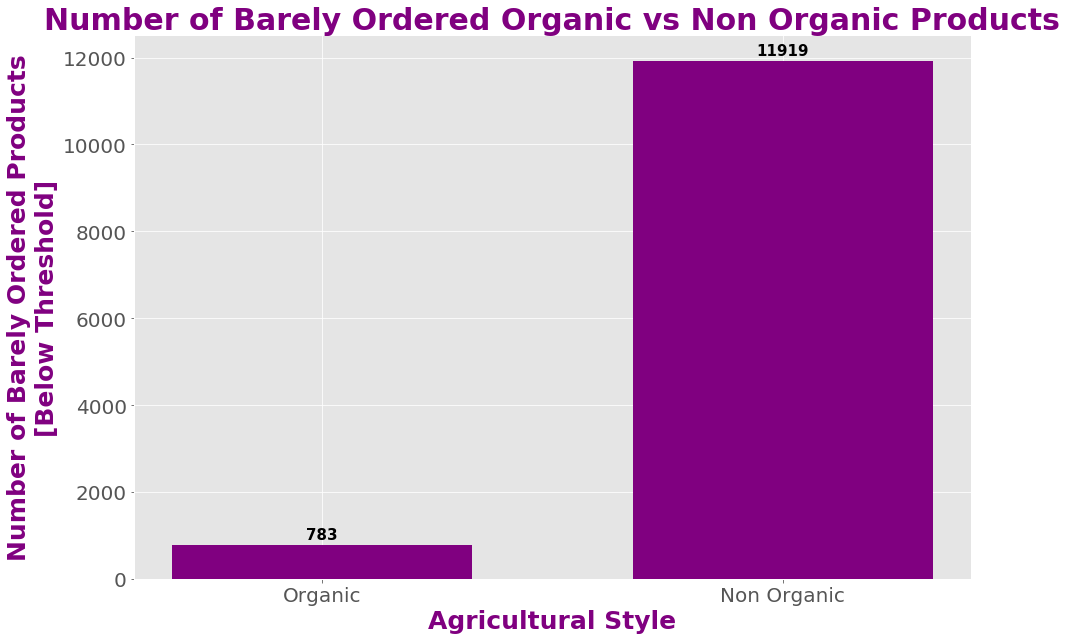

Percentage of Barely Ordered Organic Products:  15.551142005958294%
Percentage of NON Organic Products available:  26.692495465030348%


In [369]:
#6.6 Graph bar plot to show comparisson
#TODO: done
low_organics_non_organics = {}
low_organics_non_organics['Organic'] = len(outlier_organics_df)
low_organics_non_organics['Non Organic'] = len(outlier_non_organics_df)

list_keys = [k for k in low_organics_non_organics]
list_values = [v for v in low_organics_non_organics.values()]

color = 'purple'
fig, ax = plt.subplots(figsize=(15,10))
items = ax.bar(list_keys, list_values, color = color, align='center', width = 0.65)
plt.xticks(size = 20, rotation=0)
plt.yticks(size = 20)
plt.xlabel('Agricultural Style', size=25, color=color, weight='bold')
plt.ylabel('Number of Barely Ordered Products\n[Below Threshold]', size=25, color=color, weight='bold')
plt.title('Number of Barely Ordered Organic vs Non Organic Products', fontsize=30, color=color, weight='bold')

autolabel(items)

plt.show()

organic_total = len(organics_df)
non_organic_total = len(non_organics_df)
print('Percentage of Barely Ordered Organic Products: ', str(100*(list_values[0]/organic_total))+"%")
print('Percentage of NON Organic Products available: ', str(100*(list_values[1]/non_organic_total))+"%")

### 7. Count of:
1. Unique Shoppers
2. Unique Orders
3. Unique Products

In [346]:
#7.1 Count of Unique Shoppers
query = '''SELECT DISTINCT user_id as number_of_users
            FROM orders'''

number_of_users = spark.sql(query)
number_of_users_df = number_of_users.toPandas()
len(number_of_users_df)

206209

In [352]:
#7.2 Count of Unique Orders
query = '''SELECT DISTINCT order_id as number_of_orders
            FROM orders'''

number_of_orders = spark.sql(query)
number_of_orders_df = number_of_orders.toPandas()
len(number_of_orders_df)

3421083

In [348]:
#7.3 Count of Unique Products
query = '''SELECT DISTINCT product_id
            FROM products'''

number_of_products = spark.sql(query)
number_of_products_df = number_of_products.toPandas()
len(number_of_products_df)

49688

### 8. How Many Times Users have Placed an Ordered


In [374]:
#8.1 Query Distinct Users and their orders
query = '''SELECT DISTINCT user_id, COUNT(order_number) as orders
            FROM orders
            GROUP BY user_id'''

user_orders_df = spark.sql(query).toPandas()

In [401]:
# #8.2 Get mu and sigma for best fit line
# mu = np.mean(user_orders_df['orders'])
# sigma = np.std(user_orders_df['orders'])
# x = mu + sigma * user_orders_df['orders']

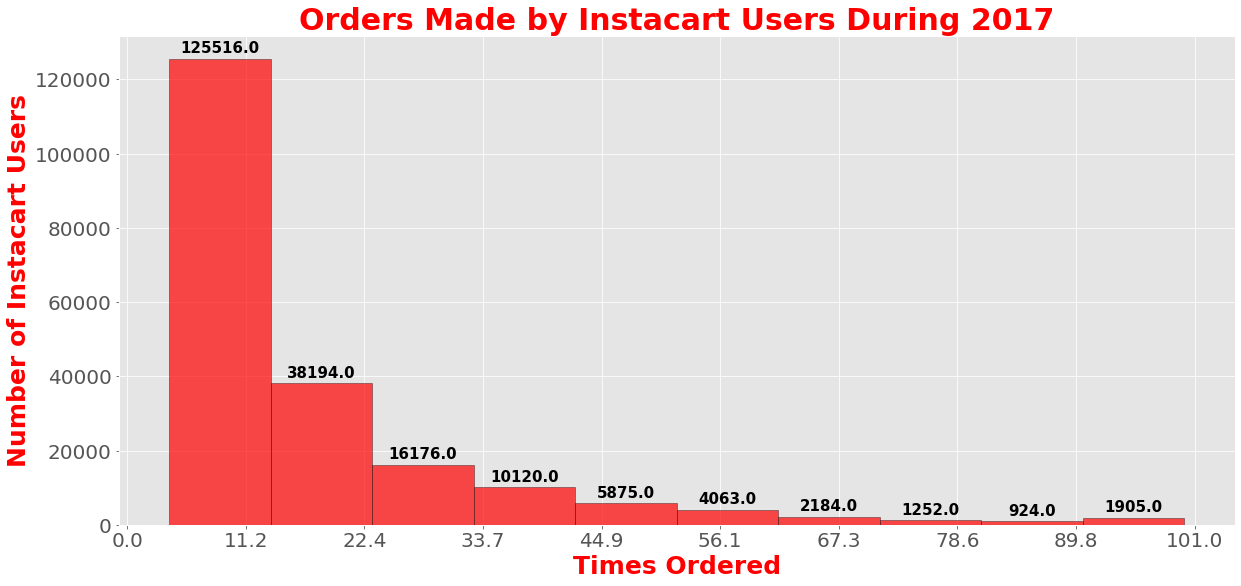

In [429]:
#8.3 Plot Histogram
color = 'red'
fig, ax = plt.subplots(figsize=(20,9))
num_bins = max(user_orders_df['orders'])//10

items, bins, patches = ax.hist(user_orders_df['orders'], color = color, alpha=0.7, edgecolor='black')
plt.xticks(np.linspace(0,max(user_orders_df['orders']+1),10),size = 20, rotation=0)
plt.yticks(size = 20)
plt.xlabel('Times Ordered', size=25, color=color, weight='bold')
plt.ylabel('Number of Instacart Users', size=25, color=color, weight='bold')
plt.title('Orders Made by Instacart Users During 2017', fontsize=30, color=color, weight='bold')

autolabel(patches)

plt.show()

### MAYBE AVERAGE TIME A PERSON HAS ORDERED PER WEEK

### 9. Average Amount of Items Per Order

In [414]:
#9.1 Query number of items per order
#NOTE: always group by if you use Count()
query = '''SELECT DISTINCT order_id, COUNT(add_to_cart_order) as num_of_items
            FROM orders_prior
            GROUP BY order_id'''

num_items_per_order = spark.sql(query).toPandas()

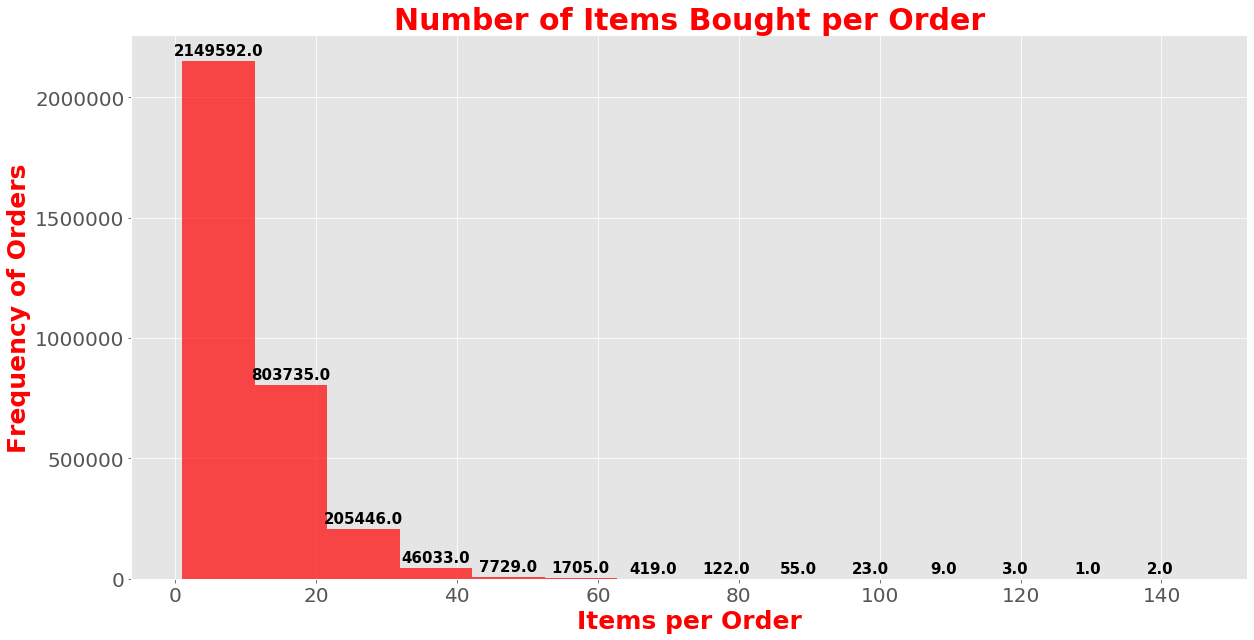

In [413]:
#9.2 Plot histogram
color = 'red'
fig, ax = plt.subplots(figsize=(20,10))
num_bins = max(num_items_per_order['num_of_items'])//10

items, bins, patches = ax.hist(num_items_per_order['num_of_items'], num_bins, color = color, alpha=0.7)
plt.xticks(size = 20, rotation=0)
plt.yticks(size = 20)
plt.xlabel('Items per Order', size=25, color=color, weight='bold')
plt.ylabel('Frequency of Orders', size=25, color=color, weight='bold')
plt.title('Number of Items Bought per Order', fontsize=30, color=color, weight='bold')

autolabel(patches)

plt.show()

### 10. Which Day and Time are people using Instacart?

In [ ]:
#Scatter plot

# RANDOM STUFF

In [ ]:
### 8. Average amount of:
1. Average amount of orders per User
2. Most about of times an single user ordered
3. Items per Order

In [367]:
#RANDOM.1 Average number of orders per user
print("Average number of orders per user: ", len(number_of_orders_df)/len(number_of_users_df))

Average number of orders per user:  16.590367054784224


In [240]:
query = ''' select *
            from (
                SELECT *, 
                dense_rank() OVER (PARTITION BY department ORDER BY orders DESC) as product_rank
                FROM (
                    SELECT products.product_name, departments.department, COUNT(orders_prior.product_id) as orders
                    FROM orders_prior
                    LEFT JOIN products
                    ON products.product_id = orders_prior.product_id
                    LEFT JOIN departments
                    ON products.department_id = departments.department_id
                    GROUP BY products.product_name, departments.department
                    ) tmp
                ORDER BY department DESC)
            where product_rank <= 3
            ORDER BY orders ASC
        '''
spark.sql(query).show()

+--------------------+-------------+------+------------+
|        product_name|   department|orders|product_rank|
+--------------------+-------------+------+------------+
|"Scotch Kids 5"" ...|         null|     3|           1|
|    93/7 Ground Beef|        other|  1307|           3|
|Instant Action Ca...|         pets|  1492|           3|
|Light CocoWhip! C...|        other|  1536|           2|
|Grain Free Turkey...|         pets|  1560|           2|
|Organic Mango Yogurt|      missing|  1675|           3|
|Grain Free Chicke...|         pets|  1825|           1|
|Peanut Butter Ice...|      missing|  1933|           2|
|Organic Black Mis...|         bulk|  2793|           3|
|Roasted Almond Bu...|        other|  3976|           1|
|  Premium Epsom Salt|personal care|  4228|           3|
|New Mexico Taco S...|international|  4680|           3|
|Lemon Verbena Han...|personal care|  4951|           2|
|  Lavender Hand Soap|personal care|  5941|           1|
|  Cabernet Sauvignon|      alc